<a href="https://colab.research.google.com/github/Kevincancino26/mis-notebook-de-estudio-/blob/main/Regresi%C3%B3n_Lineal_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regresión Lineal II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca pandas

https://pandas.pydata.org/

In [3]:
import pandas as pd

## El Dataset y el Proyecto
<hr>

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>El mercado inmobiliario ha sido objeto de varios estudios e investigaciones en los últimos tiempos. La crisis financiera que afecta a la economía ha afectado significativamente las inversiones y ganancias de este sector. Este escenario fomenta un mayor interés en los estudios de previsión de la demanda basados ​​en las características de este mercado, los inmuebles y el entorno de estos inmuebles.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>En este contexto, el principal objetivo de nuestro proyecto es desarrollar un sistema de valuación inmobiliaria utilizando la metodología de regresión lineal, que es una de las técnicas de Machine Learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nuestro *dataset* es una muestra aleatoria de 5000 inmuebles disponibles para la venta en el municipio de Rio de Janeiro.</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (US$) de oferta del inmueble</li>
    <li><b>Área</b> - Área del inmueble en m²</li>
    <li><b>Dist_Playa</b> - Distancia del inmueble a la playa (km) (en línea recta)</li>
    <li><b>Dist_Farmacia</b> - Distancia del inmueble a la farmacia más cercana (km) (en línea recta)</li>
</ul>

## Lectura de los datos

In [4]:
url = '/content/dataset.csv'
datos = pd.read_csv(url,sep=';')


## Ver los datos

In [5]:
datos.head()

,Valor,Area,Dist_Playa,Dist_Farmacia
0,850277,280,0.240925,0.793637
1,166359,208,0.904136,0.134494
2,471349,170,0.059525,0.423318
3,101664,100,2.883181,0.525064
4,406654,164,0.239758,0.192374


## Verificando el tamaño del dataset

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Valor          5000 non-null   int64  
 1   Area           5000 non-null   int64  
 2   Dist_Playa     5000 non-null   float64
 3   Dist_Farmacia  5000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 156.4 KB


# <font color='red' style='font-size: 30px;'>1.3 Analisis preliminar</font>
<hr style='border: 2px solid red;'>

## Estadísticos descriptivos


In [7]:
datos.describe().round(2)

,Valor,Area,Dist_Playa,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,259320.95,121.94,3.02,0.50
std,348108.85,90.54,3.17,0.29
min,13863.00,16.00,0.00,0.00
25%,85028.00,70.00,0.44,0.24
50%,151571.00,93.00,1.48,0.50
75%,293900.00,146.00,5.61,0.75
max,4621072.00,2000.00,17.96,1.00


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta y <b> +1 </b> indica asociación positiva perfecta.</p>

In [8]:
datos.corr().round(4)

,Valor,Area,Dist_Playa,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Playa,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


Lo que aprendimos en esta aula:

Como importar la biblioteca pandas.
Como leer y ver los datos.
Como comprobar el tamaño del dataset.
Como crear una tabla con estadísticos descriptivos de los datos del dataset.
Como crear una matriz de correlación a partir de los datos de la tabla de estadísticos descriptivos.

# <font color='red' style='font-size: 30px;'>2.1 Comportamiento de la variable dependiente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos.</p>

In [9]:
import seaborn as sns

## Configuración del formato de los gráficos

In [10]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent')
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

## Box plot de la variable *dependiente* (y)

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: title={'center': 'Precio de los Inmuebles'}, xlabel='Dolares'>

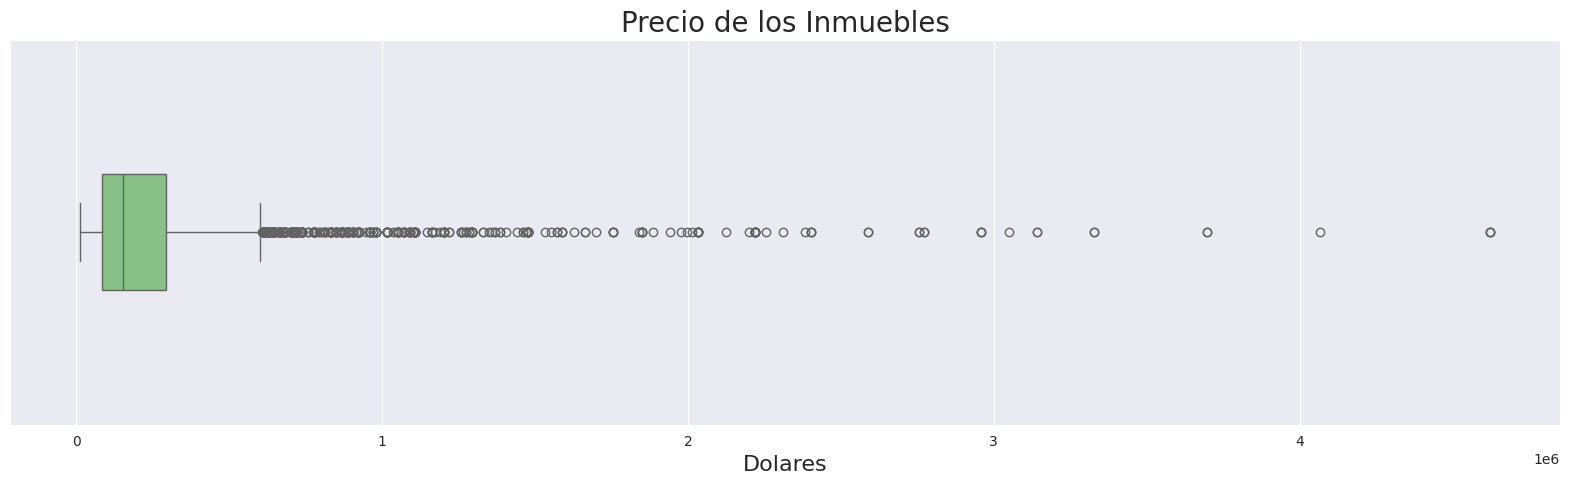

In [11]:
ax=sns.boxplot(x=datos['Valor'],orient='h',width=0.3)
ax.figure.set_size_inches(20, 5)#tamaño del grafocp
ax.set_title('Precio de los Inmuebles', fontsize=20)#titulo del grafico
ax.set_xlabel('Dolares', fontsize=16)
ax#etitqueta del grafico

al mirar el boxplot vemos que nuestra variable tiene muchso datos atipicos fuera del limite superior, debido a este comportamiento todos estos puntos los clasificamos como outliers, o quizar solo los ultimos 3 puntois sean esto, aunque la spilas de puntos pueden indicar una simetria a la derecha en la distribucion de la variable del precio

# <font color='red' style='font-size: 30px;'>2.2 Distribución de frecuencias</font>
<hr style='border: 2px solid red;'>

## Distribución de frecuencias de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

In [12]:
import matplotlib.pyplot as plt

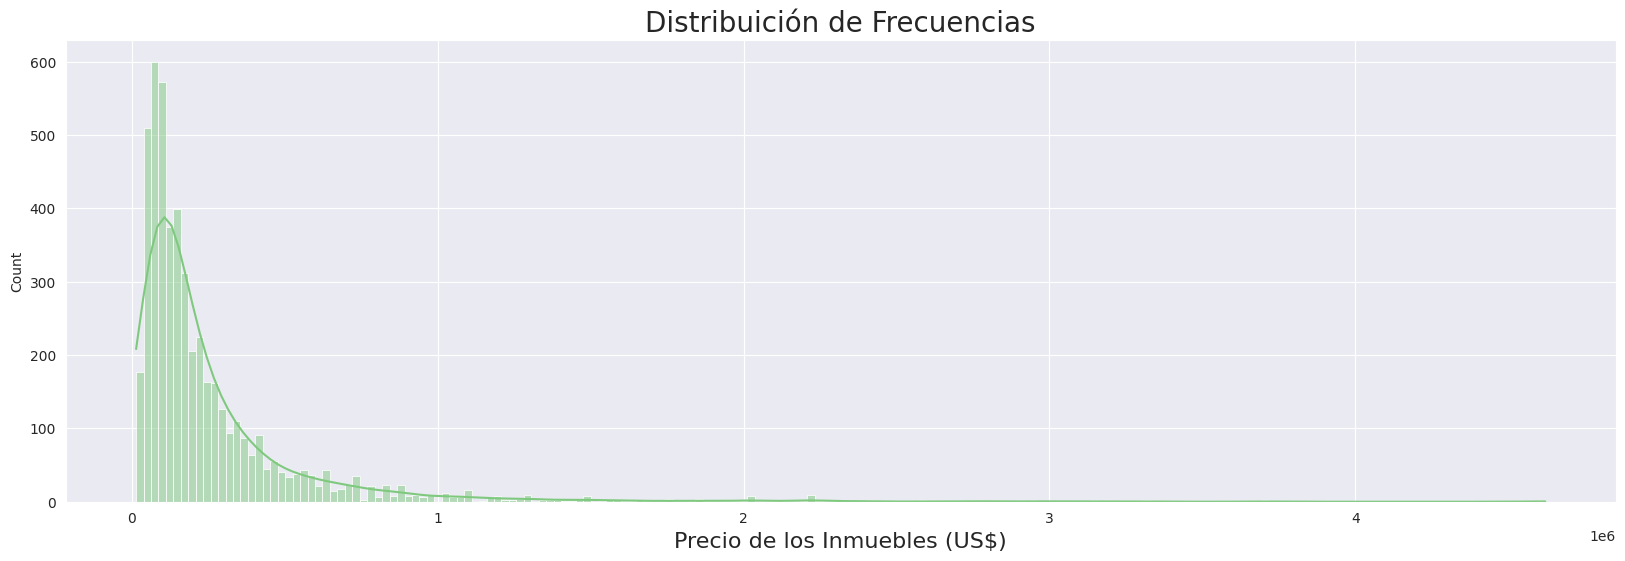

In [13]:
fig,ax=plt.subplots(figsize=(20, 6))
sns.histplot(datos['Valor'],kde=True, ax=ax)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('Precio de los Inmuebles (US$)', fontsize=16)
plt.show()

temeos que nuestros datos tiene una asimetria a la derecha, donde tenemos del lado izquierdo precios bajos de los inmuebles y pocos inmuebeles de precios altos, con inmuebles de lujo, esto es normal observar cuando vemos una diferencia en el precio de los muebles.

esto nos puede generar problemas dado que uno de los supuestos es que nuestros datos sean mas cercanos a la normal y tengan una distribucion simetrica.

obviamente la simetria perfecta no siempre estara en los datos reales,d ado que siempre habra una simetria, y la idea es que la distribucion de nuestra variable se hacerque mas a la simetria

el domelo de asimetria puede generar problemas al momento de realizar la regresion pero podemos transformar los datos para que estos se hacerquen mas a una distribucion normal, para que esten mas cercanos a la caracteristica simetrica

<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Box-Plot+II.png'>

# <font color='red' style='font-size: 30px;'>2.3 Dispersión entre las Variables</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables del dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre pares de variables en un dataset.</p>

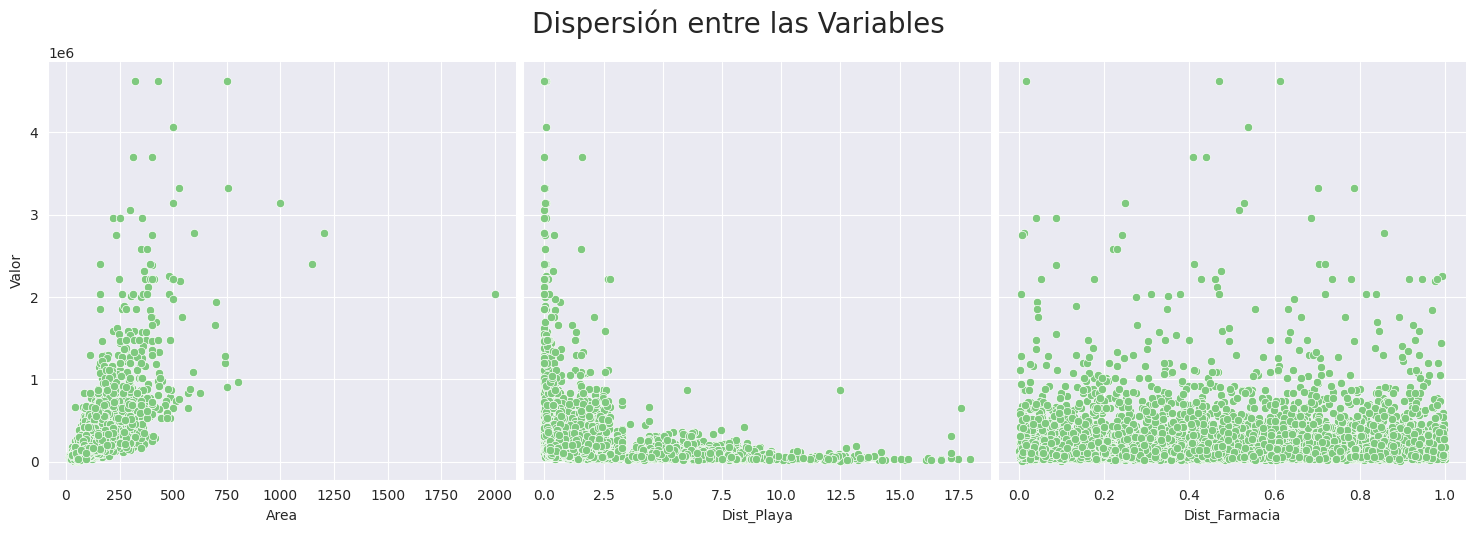

In [14]:
ax=sns.pairplot(datos,y_vars='Valor',x_vars=['Area','Dist_Playa','Dist_Farmacia'],height=5)#y es nuestra variable independiente (vars=valor),x nuestras variables dependientes
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

podemos ver la dispersion de los puntos, en valor y area podemos ver que los valores estan dispersos y que hay una cierta curba, no estan en una direcicon recta, lo mismo en valro y playa, y en valor y farmacia, no podemos idetntificar ninguna tendencia los puntos no muestran nunguna regresion

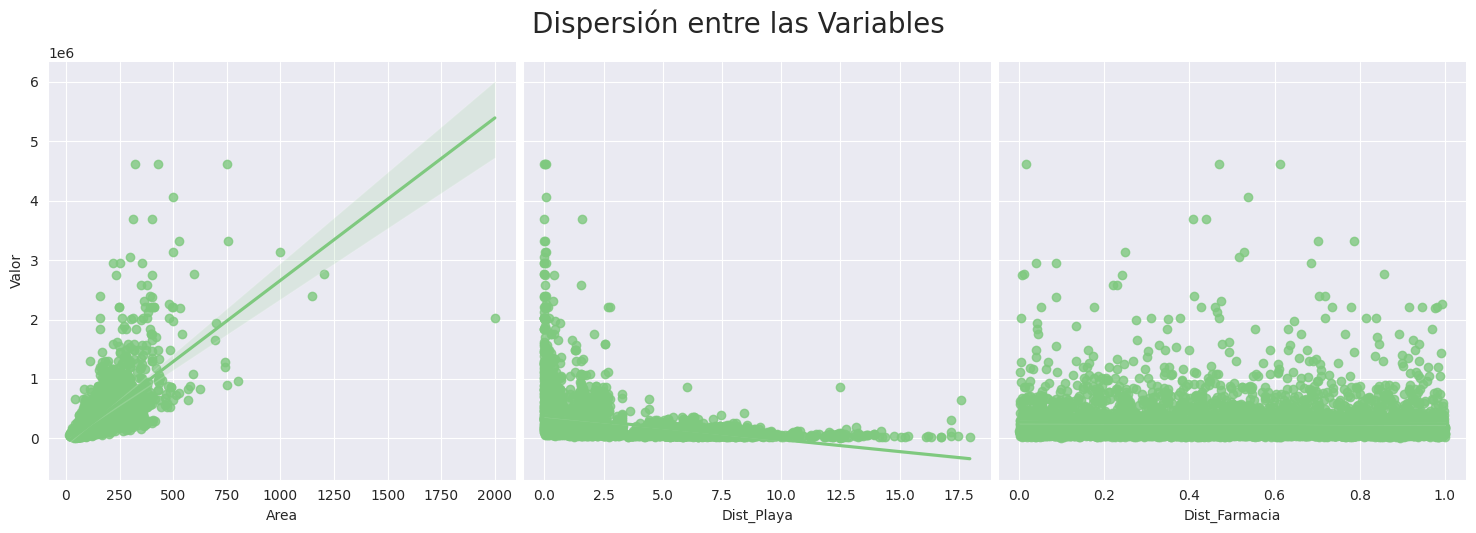

In [15]:
ax=sns.pairplot(datos,y_vars='Valor',x_vars=['Area','Dist_Playa','Dist_Farmacia'],height=5,kind='reg')
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

es la misma grafica pero con el parametro kind='reg', incluimos la linea de regresion

donde podemos ver claramente, que lso puntos no siguen la linea de regresion, un ejemplo en el tercer grafico es imperceptible dado que no lo podemos ver por los puntos, asi mismo al observar los otros dos graficos, podemos observar que estan muy dispersos en los puntos en los grafico, dado que no siguen la direccion de la linea de regresion, asi que podemos conlcuir que la variable valor no esta relacionada deforma lineal con las variables explicativas por lo tanto no podemos estimar el modelo de regresion lienal

---



## Lo que aprendimos en esta aula:

* Como configurar el formato de los gráficos.
* Como construir el box-plot de la variable dependiente.
* Como graficar la distribución de frecuencias de la variable dependiente.
* Como graficar los diagramas de dispersión entre las variables del dataset.
* Análisis de dispersión entre las variables.

# <font color='red' style='font-size: 30px;'>3.1 Transformando los Datos</font>
<hr style='border: 2px solid red;'>

## Distribuición Normal
<hr>

### ¿Porque?
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Tests paramétricos asumen que los datos muestrales se recopilaron de una población con una distribución de probabilidad conocida. Muchos de los tests estadísticos asumen que los datos siguen una distribución normal (t de Student, intervalos de confianza, etc.).</p>





<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando la biblioteca numpy

In [16]:
import numpy as np

aplicaremos la transformacion logaritmica para asi transformar nuestros datos en datos que sigan una tendencia normal o esten cercanos a esta, dado que los modelos que siguen una distribucion normal nos indican que el modleo existe o no

## Aplicando la transformación logarítmica a los datos del *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [17]:
np.log(1)

np.float64(0.0)

en lass funciones logaritmicas cuando hacemoslog de 1 este nos dara cero, pero cuando nosotros tratamos de hacer log de 0 este nos dara un indeterminado o infinito

In [18]:
datos['log_Valor']=np.log(datos['Valor'])#creamos el valor logaritmo con la funcion log y la variable valor, dado que este es diferente a 0 el valor de esta varibale
datos['log_Area']=np.log(datos['Area'])
datos['log_Dist_Playa']=np.log(datos['Dist_Playa']+1)#como los valores de estas variable on iguales o cercanos a cero, al sacar log nos daria un numero infinito por lo tando sumamos 1 a cada valrod e la variable
datos['log_Dist_Farmacia']=np.log(datos['Dist_Farmacia']+1)

## Distribuición de frecuencias de la variable *dependiente transformada* (y)

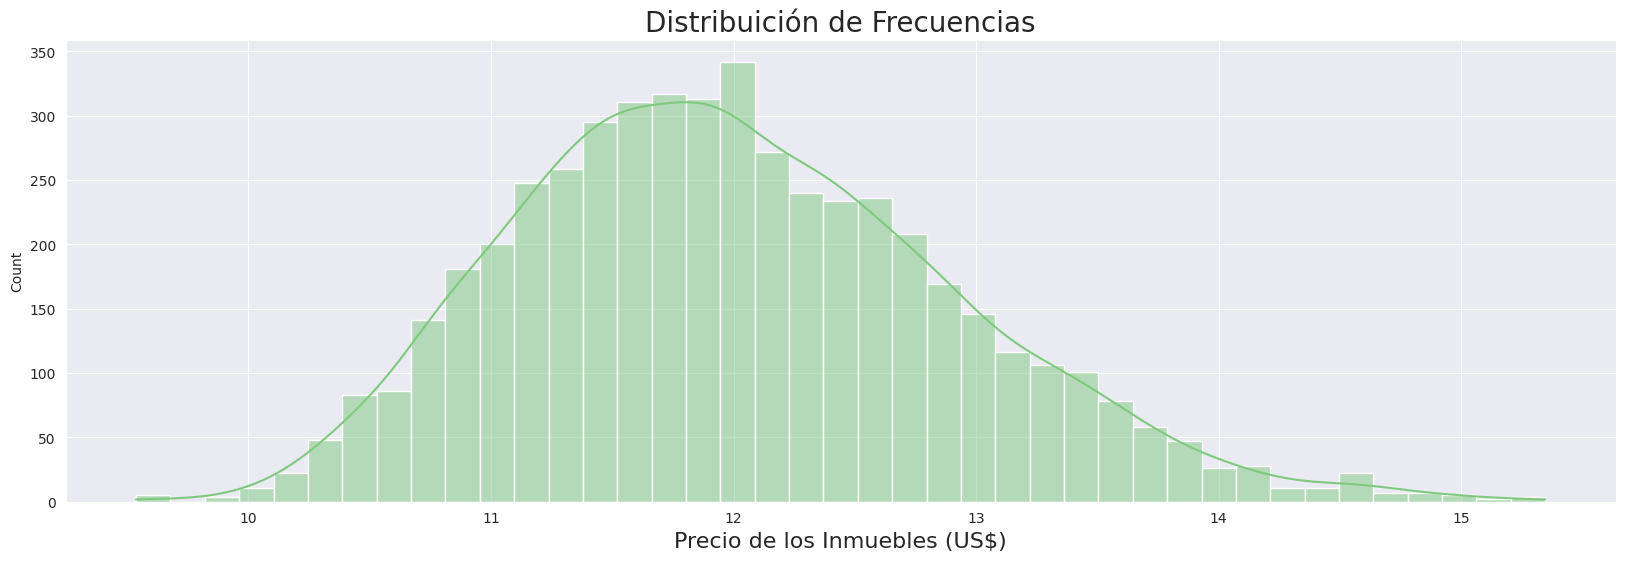

In [19]:
fig,ax=plt.subplots(figsize=(20, 6))
sns.histplot(datos['log_Valor'],kde=True, ax=ax)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('Precio de los Inmuebles (US$)', fontsize=16)
plt.show()

al analisar la grafica vemos que al hacer la transformaicon logaritmica los valores ahora no presentan asimetria a la derecha, si no preentan siemtria, siendo esto que nos dice que ahora nuestros dato estan cerca o siguen una distribucion normal, necesario que lo dato tengan una distribucion normal para realizar nuestro modelo de regrtesion lineal

# <font color='red' style='font-size: 30px;'>3.2 Comprobando relación lineal</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables transformadas del dataset

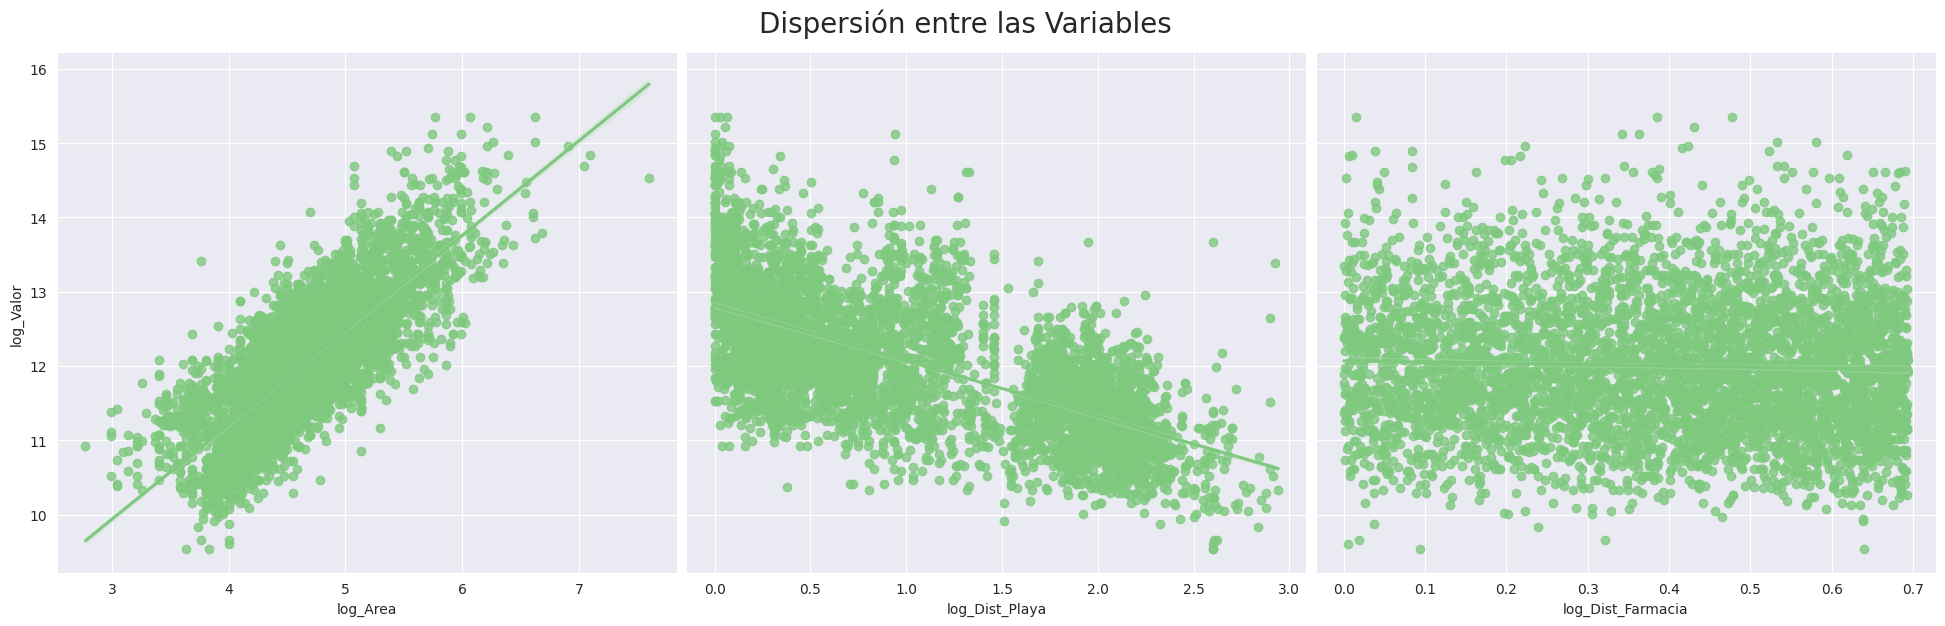

In [20]:
ax=sns.pairplot(datos,y_vars='log_Valor',x_vars=['log_Area','log_Dist_Playa','log_Dist_Farmacia'],height=5,kind='reg')
ax.figure.set_size_inches(20, 6)
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

al observar las grafica podemos decir del analii que la grafica de la relacion log_valor y log_area, tiene una relacion fuerte y poitiva, teniendo un coeficiente de correlacion mayor a 0, comporbandono que al aumentar el area aumenta el valor, con la grafica de la relacion vemoss que tienen una relacion debil y negativa con algo de dipersion y que su coeficiente de relacion es menor a 0, diciendonos que a medida que aumente el valor de la propiedad la ditancia a la playa era menor, con respecto a la ultima grafica de relacion de log_valor y log_farmacia observamos que lo datos tiene mucha disspersion y que us coeficiente de correlaicon e cercano a 0 o es 0, lo que no indica que estas do variables no tienen un relacion, por lo tanto no nos sirve para nuestro modelo y no debemos tomarla cuenta para el nuestro futuro analisis

# <font color='red' style='font-size: 30px;'>4.1 Creando los *Datasets* de Entrenamiento y Prueba</font>
<hr style='border: 2px solid red;'>

## Importando *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

ahora debemos dividir al hacer los datos en do moldelos una para entrenar y la otra para evaluar mediante predicciones, siendo esta usada por la funcion train test

In [21]:
from sklearn.model_selection import train_test_split

## Creando una Series (pandas) para almacenar el Precio de los Inmubles (y)

In [22]:
#primero nos pide un data frame para la variable independiente
y=datos['log_Valor']

## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [23]:
#segundo paso dataframe para la variables depenientes o explicativass
x=datos[['log_Area','log_Dist_Playa','log_Dist_Farmacia']]

## Creando los datasets de entrenamiento y de prueba

In [24]:
#escribimo la funcion para crear el modelo test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2811)#para los parametross
#primero agregamo y los datos independiente de nuestro dataframe, luego x dato dependientes y con
#test_size especificamos el tamaño de la muestra que queremos agregar al modelo prueba en terminos porcentualess
#como nuestro ejercicio tenemos 5,000 datos vamo a agregar el 20% de la obervaciones para nuestro conjunto de prube y
#el resto para nuetro conjunto del modelo de estrenamiento, finalmente agregamos una cemilla
#que generara numero aleatorios para que podamo generar los mimos conjunto de entrenamiento y prueba en cada ejecution de codigo y tener los mismos
#resultados a lo largo del curo

el primero de la lista es x_train que es el x del conjunto de entrenamineto este almacenara los valores de las variables explicativa del conjunto de entrenamiento, x_test e el x del conjunto de prueba y almacenara lo valores de la variables explicativa del conjunto de prubra, y=train almacenara los valores del conjunto de entrenamiento los valores independeintes, y_test almacenara lo valores independeintes del conjunto de prueba

au ves cada uno esta relacionado de acuerdo asu variable dependeinte y independeinte del conjunto sieno test o train

# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relación con una o más variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de estas últimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El *scikit-learn* es un módulo de Python especializado en soluciones para *machine learning*.</p>



<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Log-lineal.png'>

## Importando la biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [25]:
import statsmodels.api as sm #esta biblioteca nos ayuda a poder realizar la regresion y correr nuestos modelos estadisticos

## Estimando el modelo con statsmodels

In [32]:
x_train_con_constante=sm.add_constant(x_train)#añadimos el data frame de la variable explicativa x_train
x_train_con_constante.head()

,const,log_Area,log_Dist_Playa,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903


vemos que se agrego una columna al dataframe por lo tanto esta es la forma de crear una cosntante con statmodel la primera columna siempre sera formada con unos.

en algebra matricial en modelo de regresion la tabla representa la matris teorica x, al considerar la cosntante del modelo


con este dataframe podemos usar statsmodel, pero que pasa si no inlcuimos la cosntante, no hay ninguna obligacion para sacarla pero la estimacion del modelo con constante, asegura que los residuos que son la estimacion de Ui tengan un promedio de ceor

por eso uno de lso presupuestos teoricos del modelo de regresion es que los residuos tengan una media de cero, por ende estimar un modelo sin constante no nos asegura que los resiudos sean cero y tendriamos estimaciones sesgadas

In [33]:
modelo_statsmodels=sm.OLS(y_train,x_train_con_constante,hasconst=True).fit()#nos brindara los datos estrategicos del modelo

recordar para hacer los modelos usamos el metodo de minimos cuadrados ols que nos pide la variable independiente, la varibale dependiente con constante, hascont=True indicando que tnemeos constante, y fit() para implementar en conjunto los datos

# <font color='red' style='font-size: 30px;'>4.2 Evaluando el Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Evaluando las estadísticas de prueba del modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [34]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Fri, 18 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:54:17   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.6534      0.06

# <font color='red' style='font-size: 30px;'>4.3 Modificando el modelo y reevaluando el ajuste</font>
<hr style='border: 2px solid red;'>

## Creando un nuevo conjunto de variables explicativas (X)

## Creando los datasets de entrenamiento y de prueba

## Estimando el modelo con el statsmodels

## Evaluando las estadísticas de prueba para el nuevo modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

# <font color='red' style='font-size: 30px;'>5.1 Estimando el Modelo con los Datos de Entrenamiento</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* y *metrics* da la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

## Instanciando la clase *LinearRegression()*

## Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train y X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.


$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Generando predicciones para los datos de PRUEBA (X_test) con el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

## Obteniendo el coeficiente de determinación (R²) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

# <font color='red' style='font-size: 30px;'>5.2 Obteniendo Predicciones Puntuales</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

## Generando predicción puntual

## Invirtiendo la transformación para obtener la estimación en US$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

## Creando un simulador simple

# <font color='red' style='font-size: 30px;'>5.3 Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

### Obteniendo el intercepto del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> intercepto </b> representa el efecto medio en $ Y $ (Precio del Inmueble) con todas las variables explicativas excluidas del modelo. En el caso del modelo log-lineal, este coeficiente debe ser transformado utilizando la función exponencial para que sea presentado en US$.</p>

## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b> coeficientes de regresión </b> $\beta_2$ y $\beta_3 $ son conocidos como <b> coeficientes de regresión parciales </b> o <b> coeficientes angulares parciales </b>  </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Un aspecto interesante del modelo log-lineal, que lo ha hecho ampliamente utilizado en estudios aplicados, es que los coeficientes angulares $\beta_2$ y $\beta_3$ miden las elasticidades de Y en relación a $X_2$ y $X_3$, es decir, la variación porcentual de Y correspondiente a una variación porcentual dada (pequeña ) en $X_2$ y $X_3$.</p>

## Confirmando el orden de las variables explicativas en el DataFrame

## Creando una lista de nombres de las variables del modelo

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

## Interpretación de los Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> →  Excluyendo el efecto de las variables explicativas ($X_2=X_3=0$), el efecto medio en el Precio de los Inmuebles seria <b>US$ 2.093,66</b> (exp[7.646667]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Manteniendo constante el valor de $X_3$ (Distancia a la Playa), la adición de 1% en el Área de un inmueble genera, en promedio, un aumento de <b>1.06%</b> en el Precio del Inmueble.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distancia a la playa (km)</b> → Manteniendo constante el valor de $X_2$ (Área), la adición de 1% en la Distancia de un inmueble a la playa genera, en promedio, una disminución de <b>0.49%</b> en el Precio del Inmueble.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análisis Gráfico de los Resultados del Modelo</font>
<hr style='border: 2px solid red;'>

## Generando predicciones del modelo para los datos de ENTRENAMIENTO

## Gráfico de dispersión entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [ ]:

ax.figure.set_size_inches(12, 6)
ax.set_title('Predicción X Real', fontsize=18)
ax.set_xlabel('log del Precio - Predicción', fontsize=14)
ax.set_ylabel('log del Precio - Real', fontsize=14)
ax

## Obteniendo los residuos

## Graficando la distribuición de frecuencias de los residuos

In [ ]:

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias de los Residuos', fontsize=18)
ax.set_xlabel('log del Precio', fontsize=14)
ax